# Unit 5 - Financial Planning


In [9]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [10]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [11]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [12]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [13]:
# Fetch current BTC price
BTC_request = requests.get(btc_url).json()
BTC_price= BTC_request['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
ETH_request = requests.get(eth_url).json()
ETH_price= ETH_request['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = BTC_price* my_btc

my_eth_value = ETH_price* my_eth


#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13603.67
The current value of your 5.3 ETH is $1970.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [16]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-10").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        \
                             open     high       low    close    volume   
2020-05-20 00:00:00-04:00  117.03  117.340  117.0000  117.300   7298248   
2020-05-21 00:00:00-04:00  117.35  117.475  117.3200  117.360   9298498   
2020-05-22 00:00:00-04:00  117.60  117.600  117.3900  117.445   5391598   
2020-05-26 00:00:00-04:00  117.38  117.440  117.2400  117.260  10370264   
2020-05-27 00:00:00-04:00  117.50  117.540  117.3000  117.400   7335948   
...                           ...      ...       ...      ...       ...   
2020-10-05 00:00:00-04:00  117.74  117.740  117.5200  117.520   4343747   
2020-10-06 00:00:00-04:00  117.60  117.840  117.4900  117.610   3973998   
2020-10-07 00:00:00-04:00  117.53  117.660  117.4515  117.530   3867168   
2020-10-08 00:00:00-04:00  117.67  117.710  117.5900  117.690   3561383   
2020-10-09 00:00:00-04:00  117.65  117.740  117.5000  117.705   2750029   

                              SPY                                       
                             open    high       low   close     volume  
2020-05-20 00:00:00-04:00  295.82  297.87  295.5700  296.96  131889644  
2020-05-21 00:00:00-04:00  296.79  297.67  293.6886  294.79  137785798  
2020-05-22 00:00:00-04:00  294.57  295.63  293.2200  295.42  105447017  
2020-05-26 00:00:00-04:00  301.93  302.19  295.4646  299.15  158781230  
2020-05-27 00:00:00-04:00  302.12  303.57  296.8700  303.48  181751196  
...                           ...     ...       ...     ...        ...  
2020-10-05 00:00:00-04:00  336.06  339.96  336.0100  339.73   38510456  
2020-10-06 00:00:00-04:00  339.92  342.17  334.3800  334.94   74231873  
2020-10-07 00:00:00-04:00  338.12  341.63  338.0900  340.73   40579189  
2020-10-08 00:00:00-04:00  342.85  343.85  341.8600  343.73   35831859  
2020-10-09 00:00:00-04:00  345.56  347.35  344.8900  346.84   45969566  

[100 rows x 10 columns]

In [17]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close']
spy_close_price = df_portfolio['SPY']['close']


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2020-05-20 00:00:00-04:00    117.300
2020-05-21 00:00:00-04:00    117.360
2020-05-22 00:00:00-04:00    117.445
2020-05-26 00:00:00-04:00    117.260
2020-05-27 00:00:00-04:00    117.400
                              ...   
2020-10-05 00:00:00-04:00    117.520
2020-10-06 00:00:00-04:00    117.610
2020-10-07 00:00:00-04:00    117.530
2020-10-08 00:00:00-04:00    117.690
2020-10-09 00:00:00-04:00    117.705
Name: close, Length: 100, dtype: float64
Current SPY closing price: $2020-05-20 00:00:00-04:00    296.96
2020-05-21 00:00:00-04:00    294.79
2020-05-22 00:00:00-04:00    295.42
2020-05-26 00:00:00-04:00    299.15
2020-05-27 00:00:00-04:00    303.48
                              ...  
2020-10-05 00:00:00-04:00    339.73
2020-10-06 00:00:00-04:00    334.94
2020-10-07 00:00:00-04:00    340.73
2020-10-08 00:00:00-04:00    343.73
2020-10-09 00:00:00-04:00    346.84
Name: close, Length: 100, dtype: float64


In [18]:
# Compute the current value of shares
my_agg_value = agg_close_price[-1] * my_agg
my_spy_value = spy_close_price[-1] * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17342.00
The current value of your 200 AGG shares is $23541.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
df_savings = pd.DataFrame([crypto, shares], index = ['crypto','shares'])
df_savings.columns = ['amount']


# Display savings DataFrame
display(df_savings)

,amount
crypto,15574.526
shares,40883.000


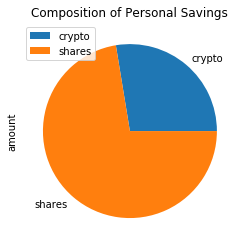

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount',title = 'Composition of Personal Savings')

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congrats, there is enough money in this fund')
elif total_savings < emergency_fund:
    print(f'Keep saving, you are ${emergency_fund - total_savings} away from your goal!')
else: print(f'Congrats on reaching your financial goal')

Congrats, there is enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
#number of simulations
num_sims= 500

MC_stocks = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [25]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002257,0.996528,0.996036,1.000306,1.005213,0.996968,0.998905,0.996203,0.996033,0.999234,...,1.003922,1.000077,0.992469,1.002762,1.010134,0.996865,1.005149,0.990604,0.995930,0.999982
2,1.013491,1.000593,0.994114,1.006701,1.003759,0.996618,0.996346,0.995185,0.999613,0.996044,...,0.993793,0.992508,0.987692,1.003315,1.010325,0.994816,1.000300,0.993800,0.998464,1.005030
3,1.016964,0.998203,0.996209,0.997395,0.992033,0.999830,0.998905,0.993466,1.001231,0.991507,...,0.999536,0.998881,0.990788,1.009064,1.017652,0.991246,1.002617,0.995631,1.010479,1.003083
4,1.022701,0.998567,0.999583,1.002878,0.986904,1.004597,0.997305,1.002897,1.003572,0.997946,...,0.996737,0.996268,0.987760,1.002592,1.017896,0.998103,0.995888,0.997249,1.009887,1.010445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.612055,4.012324,2.407592,7.777950,4.806934,6.179901,3.052182,3.884885,2.365443,5.502639,...,4.307712,3.008591,3.917978,5.146933,4.231694,3.180125,3.208537,10.816599,6.094488,9.444553
7557,3.614771,4.035948,2.383698,7.857659,4.759709,6.182005,3.057534,3.866545,2.365548,5.521291,...,4.326190,3.014168,3.906157,5.171471,4.229859,3.168507,3.207531,10.766468,6.051147,9.483273
7558,3.625339,4.032028,2.376702,7.815235,4.765843,6.138401,3.043107,3.885210,2.368873,5.514686,...,4.316089,2.992559,3.918096,5.202367,4.262772,3.178977,3.231052,10.781079,6.054890,9.518271
7559,3.635262,4.043000,2.378464,7.820392,4.771641,6.122930,3.031206,3.859468,2.362418,5.557823,...,4.313919,3.002509,3.925147,5.177593,4.244408,3.157905,3.228767,10.813929,6.069079,9.450475


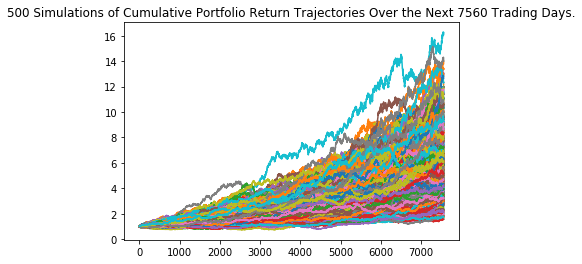

In [27]:
# Plot simulation outcomes
line_plot = MC_stocks.plot_simulation()

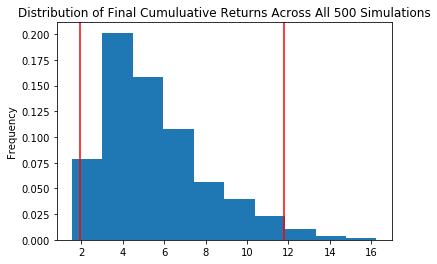

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stocks.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stocks.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.536097
std               2.524527
min               1.555675
25%               3.727982
50%               4.989927
75%               6.787675
max              16.248929
95% CI Lower      1.916868
95% CI Upper     11.808560
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of {initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of 20000 in the portfolio over the next 5 years will end within in the range of $38337.36 and $236171.2.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of {initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of 30000.0 in the portfolio over the next 5 years will end within in the range of $57506.05 and $354256.81.


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with 40/60 AGG/SPY weight
MC_stocks_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995547,1.002811,1.017733,1.011421,0.995749,1.010660,1.001660,1.006660,1.002915,1.003085,...,1.006053,0.995348,1.003525,0.994402,1.003223,1.001381,1.000512,0.999491,1.005400,0.994600
2,1.013207,1.003913,1.014483,1.009953,1.000249,1.009379,0.999438,1.013661,1.015827,1.004415,...,1.003854,1.000491,0.996819,0.981239,0.993746,0.998884,1.008301,1.004652,1.008031,1.003159
3,1.005478,1.007174,1.012443,1.010372,1.013104,0.995167,1.000005,1.020690,1.031278,1.004656,...,0.998636,1.004119,1.009232,0.983021,1.003952,1.003603,1.013688,1.000323,1.022527,0.990071
4,1.007673,1.011717,1.006570,1.009010,1.003663,0.989033,0.987614,1.028025,1.027006,1.006548,...,0.996274,0.999929,1.005070,0.984726,1.013022,1.002695,1.030416,1.007341,1.016319,0.998722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.210030,2.471588,0.983773,1.670954,0.894909,1.402465,0.998493,1.914310,2.125921,2.069326,...,1.061858,1.282962,1.770732,1.224645,1.298066,1.190544,0.963054,1.519225,1.234429,1.099902
1257,1.211305,2.463052,0.990262,1.670613,0.899610,1.407320,1.002070,1.905522,2.122046,2.062747,...,1.065228,1.262112,1.753707,1.215498,1.308098,1.193758,0.975670,1.518549,1.240839,1.096794
1258,1.218624,2.493086,0.986347,1.685776,0.898695,1.424709,0.996270,1.911418,2.132883,2.052311,...,1.065571,1.277161,1.764164,1.218817,1.317839,1.188153,0.982312,1.520385,1.237129,1.095435
1259,1.231984,2.501589,0.982095,1.695634,0.891815,1.415553,1.004170,1.893629,2.137651,2.028751,...,1.079609,1.279824,1.778462,1.213396,1.323053,1.193157,0.987329,1.500136,1.226004,1.086941


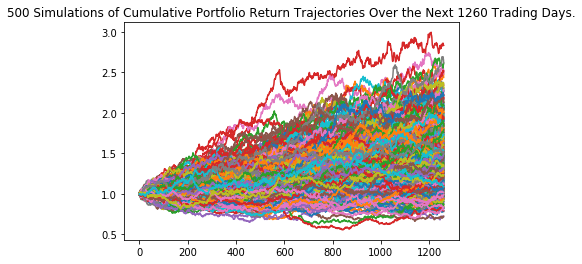

In [34]:
# Plot simulation outcomes
MC_stocks_five_year_plot = MC_stocks_five_year.plot_simulation()

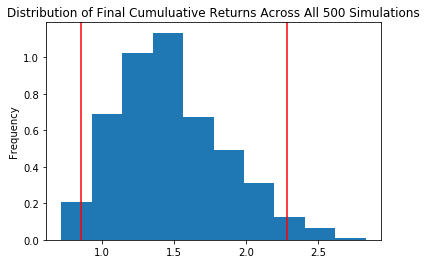

In [35]:
# Plot probability distribution and confidence intervals
MC_stocks_five_year_plot = MC_stocks_five_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = MC_stocks_five_year.summarize_cumulative_return()

# Print summary statistics
print(five_year_tbl)

count           500.000000
mean              1.473850
std               0.377582
min               0.717222
25%               1.194121
50%               1.437351
75%               1.702177
max               2.833071
95% CI Lower      0.851039
95% CI Upper      2.287566
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $115012.09 and $708513.61


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_ten_year_balanced = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_ten_year_balanced.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993890,0.991525,1.005676,0.998036,1.001731,1.003445,0.995417,1.010548,1.005041,1.007740,...,0.998048,0.997191,1.002266,0.992145,1.018997,0.991965,0.992998,0.999260,1.005474,0.998646
2,0.990598,0.992976,1.002422,1.003613,1.004762,1.002367,0.997917,1.004635,1.017574,1.006018,...,1.000733,0.992648,1.006543,0.991928,1.009995,0.998079,0.995875,0.993745,1.010570,1.002531
3,0.996815,0.999314,0.997285,0.996576,0.992573,1.003432,0.998611,1.002974,1.003559,1.010103,...,1.008952,0.987306,0.995747,0.989137,1.031556,1.003076,1.002829,0.998221,1.015934,1.001288
4,0.993478,1.000446,0.995664,1.001011,0.992074,1.003337,1.005762,1.008307,1.010761,1.013218,...,1.016479,0.990086,0.997354,0.993462,1.028247,1.001700,0.995642,1.001992,1.017340,1.008640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.259623,1.904446,2.356366,6.550005,1.734674,1.688840,2.038222,2.760034,0.909519,1.073674,...,1.070110,2.325910,0.992102,2.269529,1.646288,1.357983,1.310447,0.973318,1.975235,1.494532
2517,3.252857,1.886392,2.340871,6.579881,1.724105,1.689082,2.028543,2.749494,0.915912,1.075670,...,1.078930,2.327485,0.992105,2.279450,1.655596,1.359602,1.309316,0.967613,1.977503,1.481940
2518,3.263212,1.873862,2.332716,6.604016,1.719083,1.691002,2.043878,2.782718,0.917276,1.065408,...,1.073953,2.342553,0.988030,2.240368,1.667227,1.359422,1.287768,0.974524,1.978047,1.475687
2519,3.279584,1.874236,2.345150,6.554446,1.725453,1.681479,2.041358,2.780687,0.917973,1.068527,...,1.080947,2.336570,0.974786,2.230096,1.676148,1.354153,1.298044,0.971366,1.990584,1.482306


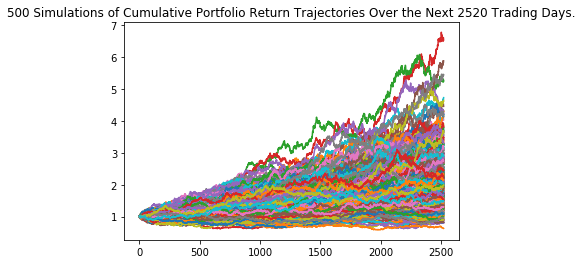

In [40]:
# Plot simulation outcomes
MC_stocks_ten_year_balanced_plot = MC_stocks_ten_year_balanced.plot_simulation()

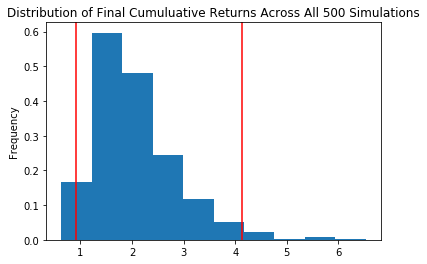

In [41]:
# Plot probability distribution and confidence intervals
MC_stocks_ten_year_balanced_distribution = MC_stocks_ten_year_balanced.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_stocks_ten_year_balanced.summarize_cumulative_return()

# Print summary statistics
ten_year_tbl

count           500.000000
mean              2.082332
std               0.818198
min               0.630865
25%               1.535500
50%               1.910036
75%               2.455070
max               6.529490
95% CI Lower      0.918422
95% CI Upper      4.126473
Name: 2520, dtype: float64

In [43]:
# Set initial investment
initial_investment = 80000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $80,000
ci_lower = round(ten_year_tbl[8]*initial_investment,2)
ci_upper = round(ten_year_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 10 years will end within in the range of $73473.76 and $330117.81
